In [ ]:
class TransportationProblem(object):
    def __init__(self, n):
        self.n = n
    
    def initialState(self):
        return 1
    
    def isEnd(self, state):
        return state == self.n
    
    def actions(self, state):
        moves = []
        if state + 1 <= self.n:
            moves.append('walk')
        if state * 2 <= self.n:
            moves.append('tram')
        return moves
    
    def cost(self, state, action):
        if action == 'walk':
            return 1
        if action == 'tram':
            return 2
    
    def successor(self, state, action):
        if action == 'walk':
            return state + 1
        if action == 'tram':
            return state * 2

In [ ]:
def edges(problem, state):
    return [
        (action,
         problem.successor(state, action),
         problem.cost(state, action))
        for action in problem.actions(state)
    ]

#BackTracking

**Para la tarea:** Escribe una implementación de `backtrackingSearch` que sea funcionalmente equivalente a la implementación de arriba sin utilizar variables fuera del ámbito local de una función.

In [ ]:
problem = TransportationProblem(n = 20)

Podriamos usar un diccionario que guarde bestCost y bestPath en lugar de variables separadas

In [ ]:
def backtrackingSearch(problem):
    best ={
        'cost' : float('+inf'),
        'path' : None
    }

    def findBest(state, path, cost):
        if problem.isEnd(state):
            if cost < best['cost']:
                best['cost'] = cost
                best['path'] = path
            return
        for action, next_state, next_cost in edges(problem, state):
            findBest(next_state, path + [(action, next_state, next_cost)], cost + next_cost)
    findBest(state = problem.initialState(),
             path = [],
             cost = 0)
    return (best['cost'],best['path'])

In [ ]:
backtrackingSearch(problem)

(8,
 [('walk', 2, 1),
  ('walk', 3, 1),
  ('walk', 4, 1),
  ('walk', 5, 1),
  ('tram', 10, 2),
  ('tram', 20, 2)])

**Para la tarea:** Modela el juego de las torres de Hanói como un problema de búsqueda.

![image.png](
    
)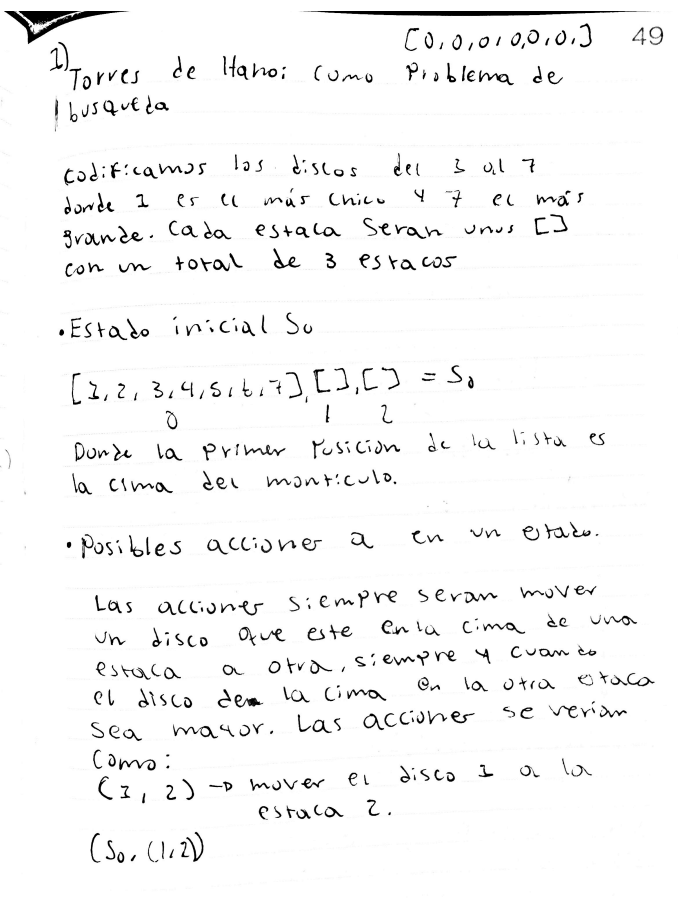

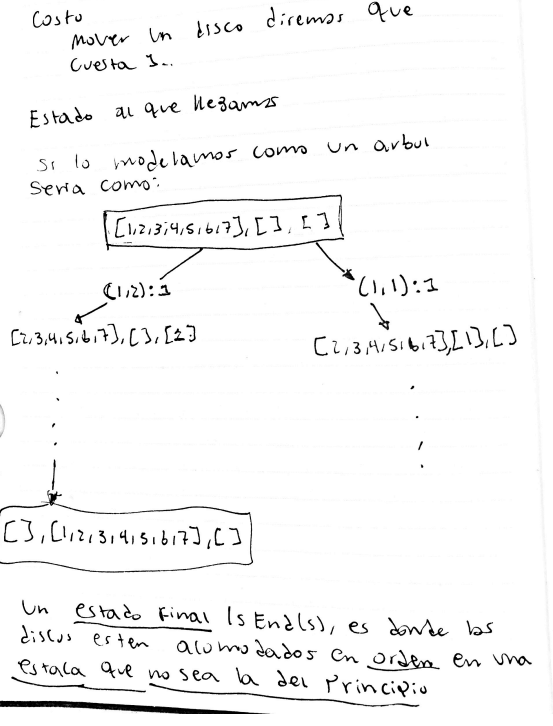

**Para la tarea:** Escribe un programa de Python que genere un tablero de Sudoku resuelto de forma aleatoria de tamaño $9\times9$.  No busques algoritmos para lograr esto, en su lugar, plantea una idea clave para resolver el problema y asegúrate que tu implementación sea lo más clara y entendible que puedas.

In [ ]:
import random

In [ ]:
def generar_tablero():
    #Genera un tablero de Sudoku resuelto de forma aleatoria de tamaño 9x9.
    
    tablero = [[0 for _ in range(9)] for _ in range(9)]
    
    # Rellenar la diagonal principal con números aleatorios del 1 al 9
    numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    random.shuffle(numeros)
    for i in range(9):
        tablero[i][i] = numeros[i]
    
    # Resolver el resto del tablero utilizando backtracking
    resolver_backtracking(tablero, 0, 0)
    
    return tablero

In [ ]:
def resolver_backtracking(tablero, fila, columna):
    #Resuelve el tablero utilizando backtracking.

    if columna == 9:
        fila += 1
        columna = 0
    if fila == 9:
        return True
    
    # Si la celda ya está rellenada, pasar a la siguiente
    if tablero[fila][columna] != 0:
        return resolver_backtracking(tablero, fila, columna+1)
    
    # Probar con todos los números del 1 al 9
    for num in range(1, 10):
        if es_valido(tablero, fila, columna, num):
            tablero[fila][columna] = num
            if resolver_backtracking(tablero, fila, columna+1):
                return True
            tablero[fila][columna] = 0
    
    return False

In [ ]:
def es_valido(tablero, fila, columna, num):
    #Comprueba si un número dado es válido en una celda del tablero.
    
    # Comprobar fila
    for i in range(9):
        if tablero[fila][i] == num:
            return False
    
    # Comprobar columna
    for i in range(9):
        if tablero[i][columna] == num:
            return False
    
    # Comprobar subcuadrícula 3x3
    subfila = (fila // 3) * 3
    subcolumna = (columna // 3) * 3
    for i in range(3):
        for j in range(3):
            if tablero[subfila+i][subcolumna+j] == num:
                return False
    
    return True

In [ ]:
tablero = generar_tablero()
for fila in tablero:
    print(fila)

[3, 1, 2, 4, 5, 6, 7, 8, 9]
[5, 4, 6, 7, 8, 9, 1, 3, 2]
[7, 8, 9, 2, 1, 3, 4, 5, 6]
[2, 3, 4, 1, 6, 8, 5, 9, 7]
[1, 5, 8, 9, 7, 4, 2, 6, 3]
[6, 9, 7, 3, 2, 5, 8, 1, 4]
[8, 7, 3, 5, 9, 2, 6, 4, 1]
[4, 6, 1, 8, 3, 7, 9, 2, 5]
[9, 2, 5, 6, 4, 1, 3, 7, 8]


#Dept-first Search (DFS)

In [ ]:
def depthFirstSearch(problem):
    bestPath = {'path' : None}

    def findBestPath(state,path):
        #En este algoritmo solo nos fijamos por el camino, no tomamos en cuenta el costo
        if problem.isEnd(state): 
            #Devolvemos el primer camino que llegue hasta el estado final u objetivo.
            bestPath['path'] = path
            return

        for action, next_state, next_cost in edges(problem, state):
            findBestPath(next_state, path + [(action, next_state)])
    findBestPath(state=problem.initialState(),path=[])
    return(bestPath)

In [ ]:
problem2 = TransportationProblem(n = 15)

In [ ]:
print(depthFirstSearch(problem2))

{'path': [('tram', 2), ('tram', 4), ('tram', 8), ('walk', 9), ('walk', 10), ('walk', 11), ('walk', 12), ('walk', 13), ('walk', 14), ('walk', 15)]}


# Breadth-first search (BFS) 

La búsqueda a lo ancho utiliza una cola de estados pendientes de explorar.  Saca un estado de la cola y luego encola sus sucesores.  Esta busqueda considera todas las trayectorias que consisten de una arista, luego todas las de dos, luego todas las de tres, etc., hasta que encuentra una trayectoria que llega a un estado final.

In [ ]:
def breadthFirstSearch(problem):
    solution ={
        'cost' : float('+inf'),
        'path' : None
    }
    no_visited=[]
    visited = []

    def findFirstSolution(state,path,cost):
        #Agregamos el estado
        if len(visited) == 0:
            visited.insert(0,state)
        
        if problem.isEnd(state):
            solution['cost'] = cost
            solution['path'] = path
            return

        for action, next_state, next_cost in edges(problem, state):
            no_visited.insert(0,next_state)
            findFirstSolution(no_visited[0], path + [(action, next_state, next_cost)], cost + next_cost)
    findFirstSolution(state = problem.initialState(),
        path = [],
        cost = 0)
    return (solution['cost'],solution['path'])

In [ ]:
breadthFirstSearch(problem2)

(13,
 [('tram', 2, 2),
  ('tram', 4, 2),
  ('tram', 8, 2),
  ('walk', 9, 1),
  ('walk', 10, 1),
  ('walk', 11, 1),
  ('walk', 12, 1),
  ('walk', 13, 1),
  ('walk', 14, 1),
  ('walk', 15, 1)])

#DynamicProgramming

**Para la tarea:** Observa que tanto la implementación de `futureCosts` como de `dynamicProgramming` iteran sobre las aristas del estado actual. Programa una mejor implementación combinando las ideas de ambas funciones.

In [ ]:
def dynamicProgramming(problem):
    C = {}
    def futureCost(state):
        if problem.isEnd(state):
            C[state]=0
        if state in C:
            return C[state]
        C[state] = min(next_cost + futureCost(next_state) for action, next_state,next_cost in edges(problem,state))
        return C[state]
    futureCost(problem.initialState())
    return C

In [ ]:
problem_dynamic = TransportationProblem(n=8)

In [ ]:
dynamicProgramming(problem_dynamic)

{8: 0, 7: 1, 6: 2, 5: 3, 4: 2, 3: 3, 2: 4, 1: 5}

#Busqueda de costo uniforme

**Para la tarea:** ¿Por qué el algoritmo de Dijkstra no puede trabajar con pesos negativos? ¿Qué pasa si le sumamos a todos los pesos el peso mínimo de la gráfica? Presenta una gráfica dirigida ponderada en donde esta "solución" no funciona.

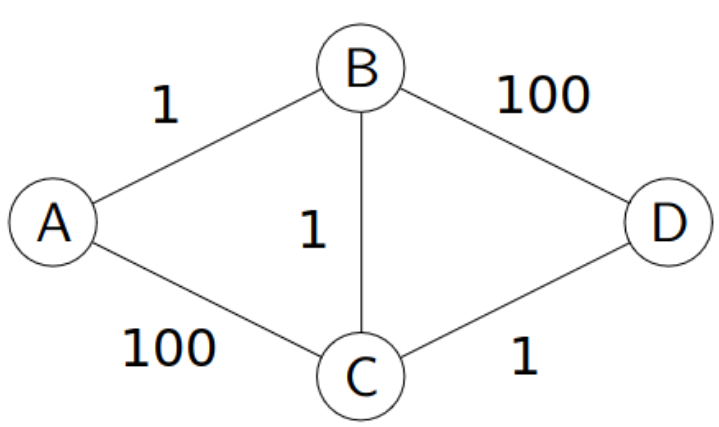

El problema con los pesos negativos es que pueden provocar ciclos negativos, es decir, ciclos en los que la suma de los pesos es negativa. En estos casos, el algoritmo de Dijkstra no puede determinar cuál es el camino mínimo, ya que puede entrar en un bucle infinito tratando de actualizar las distancias mínimas a los nodos afectados por el ciclo negativo.

En esta grafica especifica, no habria ninguna utilidad real al sumarle el minimo. La ruta mas corta seguiria siendo A,B,C,D.

En una grafica con pesos negativos podria ayudar esta solucion.

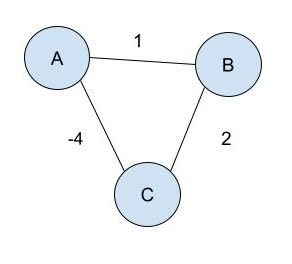

En esta grafica no funcionaria. 
Si queremos llegar a C desde A, el camino minimo es A->C con el peso de -4; sumar esto al resto de pesos lo volveria negativos